<a href="https://colab.research.google.com/github/marwamhz/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of product sales
- Author : Marwa Mehrez

##Project Overview


##Load and Inspect Data

In [3]:
# Mount google drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# save the file path and load data as df_sales
fpath = '/content/drive/MyDrive/CodingDojo/Project1/sales_predictions_2023.csv'
df_sales = pd.read_csv(fpath)

In [6]:
# Display the first 5 rows of the DataFrame
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
# Display the summary of the DataFrame
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Clean Data

### 1) How many rows and columns?

In [8]:
# determine the number of rows and coloumns
df_sales.shape

(8523, 12)

### 2) What are the datatypes of each variable?

In [9]:
# determine the datatype of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### 3) Are there duplicates? If so, drop any duplicates.

In [10]:
# save a filter called "duplicates" that identifies duplicated rows
duplicates = df_sales.duplicated()
# calculate the sum of duplicated rows to determine the number of duplicated rows
duplicates.sum()

0

- Check if there is duplicated rows with small discrapancy

In [11]:
# check nunique value in the DataFrame
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [12]:
# set Item_Identifier and Outlet_Identifier as an index
df_sales = df_sales.set_index(['Item_Identifier','Outlet_Identifier'])
df_sales.head()

,,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Outlet_Identifier,,,,,,,,,,
FDA15,OUT049,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,OUT018,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,OUT049,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,OUT010,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,OUT013,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
# check if there is duplicates in the new DataFrame
duplicates_rows = df_sales.duplicated()
# calculate the sum of duplicated rows to determine the number of duplicated rows
duplicates_rows.sum()

0

### 4) Identify missing values.

In [14]:
# save a filter called "nulls" that identifies null values for all columns
nulls = df_sales.isna().sum()
nulls

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5) Address the missing values by using a placeholder value.

- The columns Item_Weight and Outlet_Size contain missing values. First, we will check the datatype of each of these columns

In [15]:
#  check the datatype for Item_Weight column
df_sales['Item_Weight'].dtype

dtype('float64')

In [16]:
#  check the datatype for Outlet_Size column
df_sales['Outlet_Size'].dtype

dtype('O')


 - The Item_Weight column datatype is a float so we will fill the missig value with either the mean or the median.

In [17]:
# check statistics for Item_Weight column
df_sales['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [18]:
# We will fill null values in Item_Weight with the median
# set a variable for Item weight median
Item_Weight_median = df_sales['Item_Weight'].median()
# Fill null values in Item_Weight with the median
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(Item_Weight_median)


  - The Outlet_Size column datatype is a string so we will fill the missig value with a categorical placeholder called Missing.

In [19]:
# Fill null values in Outlet_Size with 'Missing'
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna('Missing')

### 6) Confirm that there are no missing values after addressing them.

In [20]:
# confirm no missing values using pandas
df_sales.isna().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [21]:
# save a list of object columns
object_col = df_sales.select_dtypes('object').columns
object_col

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [22]:
# Find the nunique values for the object columns
df_sales[object_col].nunique()

Item_Fat_Content         5
Item_Type               16
Outlet_Size              4
Outlet_Location_Type     3
Outlet_Type              4
dtype: int64

In [23]:
# obtain the value counts for all string columns
for col in object_col:
  print(f'The value counts for {col}')
  print(df_sales[col].value_counts())
  # add an empty line to increase readibility
  print('\n')

The value counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


The value counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


The value counts for Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


The value counts for Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


The value counts for Outlet_Type
Superm

- It seems that Item_Fat_Content column has inconsistent values that need to be addressed

In [24]:
# review the value counts for Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
# Standardize  the values in the Item_Fat_Content column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'})
# check the value counts for Item_Fat_Content column
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 8) For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [26]:
# save a list of num columns
num_col = df_sales.select_dtypes('number').columns
num_col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
# obtain the summary statistics for each numerical columns
for name in num_col:
  print(f'The summary statistics for {name} is')
  print(df_sales[name].describe())
  # add an empty line to increase readibility
  print('\n')

The summary statistics for Item_Weight is
count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: Item_Weight, dtype: float64


The summary statistics for Item_Visibility is
count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64


The summary statistics for Item_MRP is
count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64


The summary statistics for Outlet_Establishment_Year is
count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: floa

##Exploratory Data Analysis

### 1) Make histograms to view the distributions of numerical features in the dataset and boxplots to view their statistical summaries.

In [28]:
# define a funtion to plot a histogram and a boxplot for numerical columns
def numeric_plot(df,col) :
  # add temporarily the ggplot style
  with plt.style.context('ggplot'):
    # make a figure and axes sharing the same y-axis
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,5), sharex=True)
    # use seaborn to plot a histogram
    sns.histplot(data=df, x=col, color='steelblue', ax=axes[0])
    # use seaborn to plot a boxplot
    sns.boxplot(data=df_sales, x=col, color='steelblue', ax=axes[1])
    # set a variable called mean for column and show the mean on the graph
    mean_col = df[col].mean()
    axes[1].axvline(mean_col, color='y', linestyle='dotted', linewidth=2, label="Mean")
    # set title
    axes[0].set_title(f'Explore data for {col}')
    # add legend
    axes[1].legend(loc=(1.02, 0))

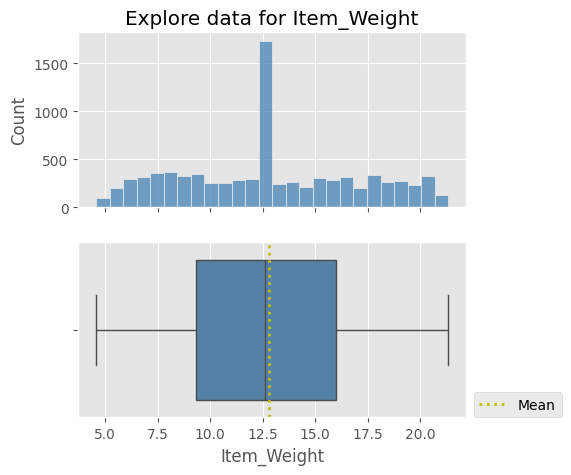

In [29]:
# Plotting a histogram and a boxplot for Item_Weight
numeric_plot(df_sales, 'Item_Weight')

- The histogram shows that there is a bin with an important high count compared to other bins. This is due to the fact that we used the medien to fill missing data for item weight.  
- The boxplot show that there is no outliners.

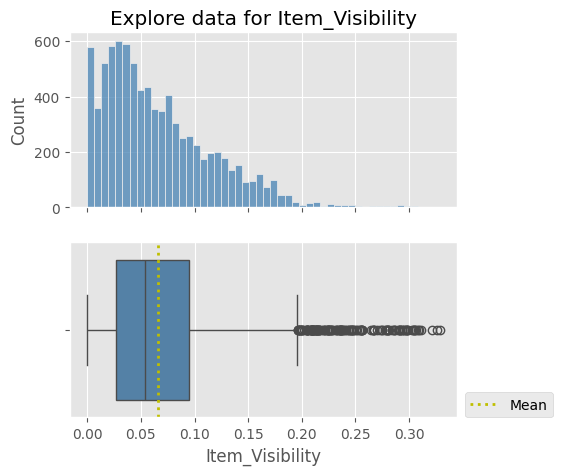

In [31]:
# Plotting a histogram and a boxplot for Item_Visibility
numeric_plot(df_sales, 'Item_Visibility')

- The median and mean are different. This means that there is items that are more visible than others.
- The boxplot shows that there is outliners.

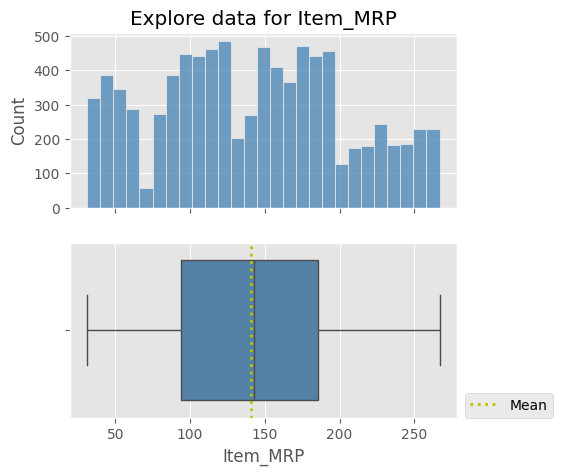

In [32]:
# Plotting a histogram and a boxplot for Item_MRP
numeric_plot(df_sales, 'Item_MRP')

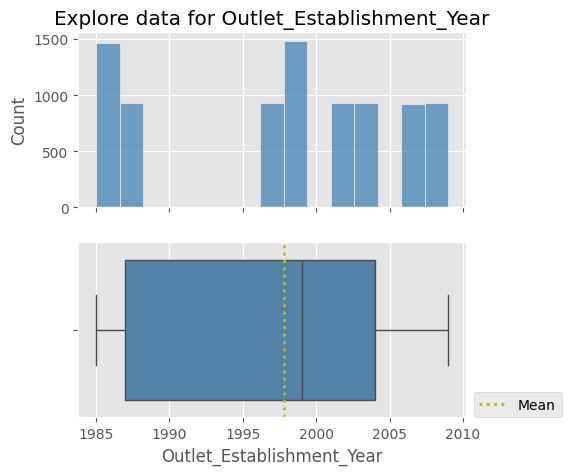

In [33]:
# Plotting a histogram and a boxplot for Outlet_Establishment_Year
numeric_plot(df_sales, 'Outlet_Establishment_Year')

- The majority of store were establiched after 1995.

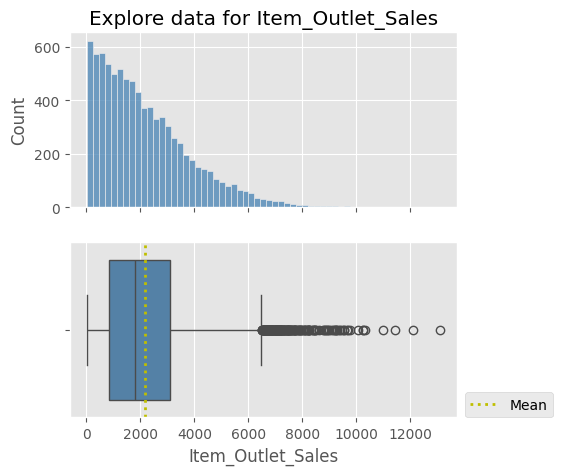

In [35]:
# Plotting a histogram and a boxplot for Item_Outlet_Sales
numeric_plot(df_sales, 'Item_Outlet_Sales')

- These figures show that approximatively half of sales of a product in a particular store are under 2000.



### 2) Make countplots to view the frequency of each class of categorial features in the dataset.

In [38]:
# define a funtion to plot a histogram and a boxplot for numerical columns
def cat_plot(df,col) :
  # use seaborn to plot a countplot
  val_counts = df[col].value_counts()
  ax = sns.countplot(data=df, x=col, order= val_counts.index, color='steelblue')
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
  # set title and labels
  ax.set_title(f'Frequency of {col}', fontsize=12, fontweight='bold')

<ipython-input-38-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


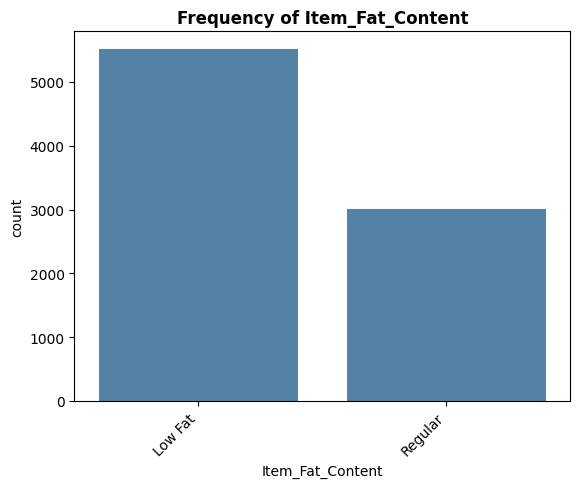

In [39]:
# Plotting a countplot for Item_Fat_Content
cat_plot(df_sales, 'Item_Fat_Content')

- The majority of Item are low fat

<ipython-input-38-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


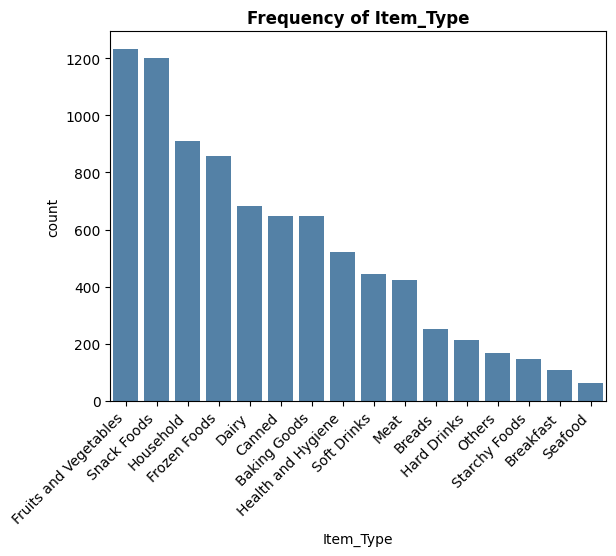

In [40]:
# Plotting a countplot for Item_Type
cat_plot(df_sales, 'Item_Type')

- The two category (to which the product belongs) that have the highest frequency are:
 - Fruits and Vegetables
 - Snack Foods

<ipython-input-38-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


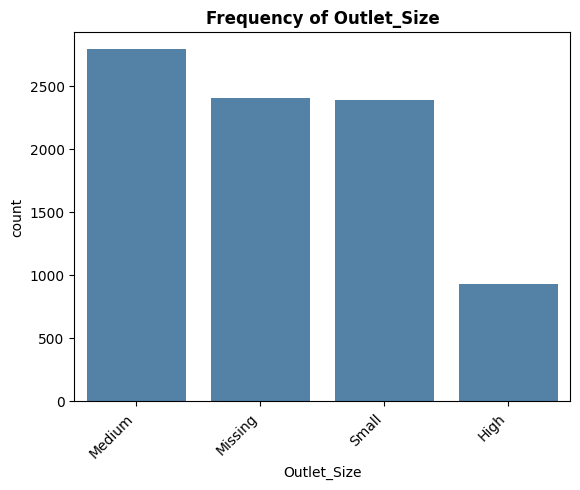

In [41]:
# Plotting a countplot for Outlet_Size
cat_plot(df_sales, 'Outlet_Size')

- Without considering the missing data, the size of most stores is medium.

<ipython-input-38-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


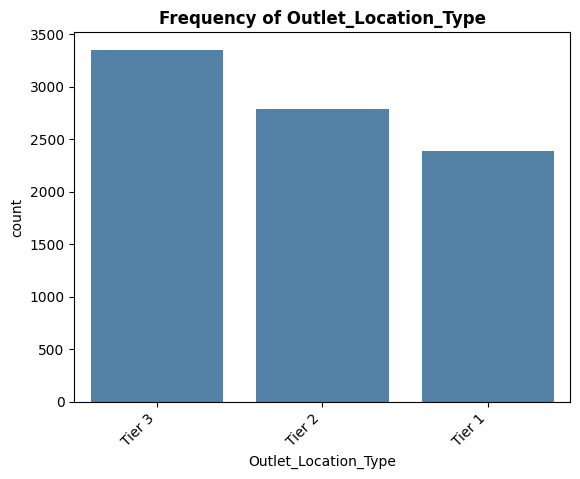

In [42]:
# Plotting a countplot for Outlet_Location_Type
cat_plot(df_sales, 'Outlet_Location_Type')

<ipython-input-38-a22e5fe58cdf>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


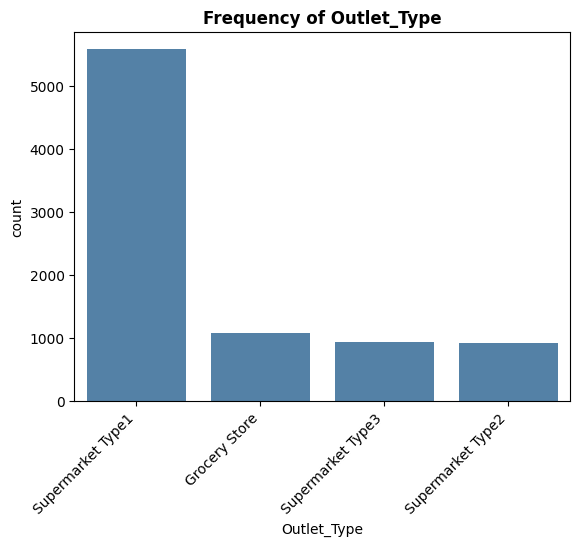

In [43]:
# Plotting a countplot for Outlet_Type
cat_plot(df_sales, 'Outlet_Type')

- This figure shows that most of the stores are supermarket Type1.

### 3) Make Heatmap to view the correlation between features.

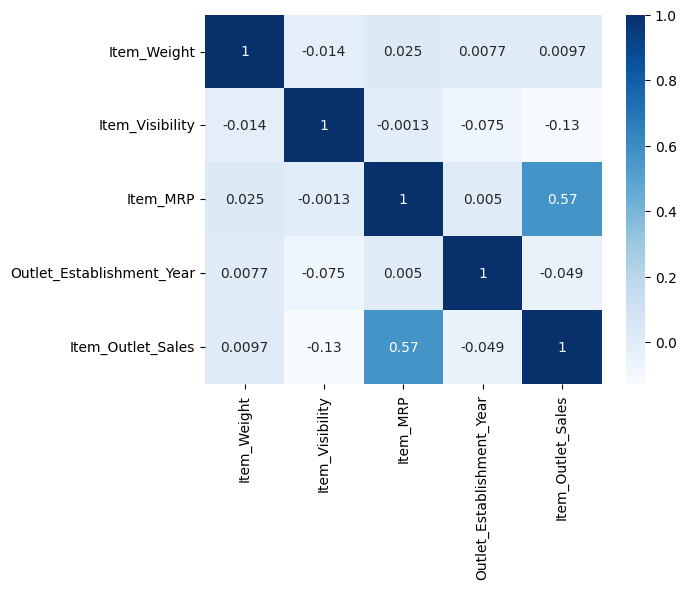

In [45]:
# set a variable for correlation
corr = df_sales.corr(numeric_only=True)
corr.round(2)
# Make a heatmap
sns.heatmap(corr, cmap='Blues',annot=True);

- The heat map shows that there is a positive correlation between Item_outlet_Sales and Item_MRP. This correlation is moderate.

##Feature Inspection